# CSC294-082 Project (Decision tree part)
#### Author: Xinyi Ji

In [70]:
# multi-class classification with Keras
import pandas
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [71]:
# load dataset
dataframe = pandas.read_csv("data_mlp.csv")
dataset = dataframe.values
dataset.shape

(3370, 513)

In [72]:
X = dataset[:,0:512].astype(np.float64)
#X = np.around(X, decimals=1)
Y = dataset[:,512]
#Y = np.random.randint(2, size=3370)

In [73]:
X_train = X[:2700]
Y_train = Y[:2700]

In [74]:
X_val = X[2700: 2700+370]
Y_val = Y[2700: 2700+370]

In [75]:
X_test = X[2700+370:]
Y_test = Y[2700+370:]

In [33]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=34)
# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

In [34]:
# Use the forest's predict method on the test data
predictions = clf.predict(X_train)
# Calculate the absolute errors
errors = np.sum(list(predictions != Y_train))
# Print out the mean absolute error (mae)
print('Error:', errors)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / len(Y_train))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Error: 0
Accuracy: 100.0 %.


In [35]:
# Use the forest's predict method on the test data
predictions = clf.predict(X_val)
# Calculate the absolute errors
errors = np.sum(list(predictions != Y_val))
# Print out the mean absolute error (mae)
print('Error:', errors)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / len(Y_val))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Error: 357
Accuracy: 3.51 %.


In [37]:
train_accuracy = []
val_accuracy = []
for depth in range(34, 0, -1):
  print('depth == ', depth)
  # Create Decision Tree classifer object
  clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
  # Train Decision Tree Classifer
  clf = clf.fit(X_train,Y_train)

  # Use the forest's predict method on the test data
  predictions = clf.predict(X_train)
  # Calculate the absolute errors
  errors = np.sum(list(predictions != Y_train))
  # Print out the mean absolute error (mae)
  print('Training Error:', errors)
  # Calculate mean absolute percentage error (MAPE)
  mape = 100 * (errors / len(Y_train))
  # Calculate and display accuracy
  accuracy = 100 - np.mean(mape)
  print(' Training Accuracy:', round(accuracy, 2), '%.')
  train_accuracy.append(accuracy)

  # Use the forest's predict method on the test data
  predictions = clf.predict(X_val)
  # Calculate the absolute errors
  errors = np.sum(list(predictions != Y_val))
  # Print out the mean absolute error (mae)
  print('Error:', errors)
  # Calculate mean absolute percentage error (MAPE)
  mape = 100 * (errors / len(Y_val))
  # Calculate and display accuracy
  accuracy = 100 - np.mean(mape)
  print('Validation Accuracy:', round(accuracy, 2), '%.')
  val_accuracy.append(accuracy)

depth ==  34
Training Error: 0
 Training Accuracy: 100.0 %.
Error: 352
Validation Accuracy: 4.86 %.
depth ==  33
Training Error: 2
 Training Accuracy: 99.93 %.
Error: 355
Validation Accuracy: 4.05 %.
depth ==  32
Training Error: 4
 Training Accuracy: 99.85 %.
Error: 351
Validation Accuracy: 5.14 %.
depth ==  31
Training Error: 7
 Training Accuracy: 99.74 %.
Error: 349
Validation Accuracy: 5.68 %.
depth ==  30
Training Error: 11
 Training Accuracy: 99.59 %.
Error: 354
Validation Accuracy: 4.32 %.
depth ==  29
Training Error: 27
 Training Accuracy: 99.0 %.
Error: 360
Validation Accuracy: 2.7 %.
depth ==  28
Training Error: 48
 Training Accuracy: 98.22 %.
Error: 354
Validation Accuracy: 4.32 %.
depth ==  27
Training Error: 69
 Training Accuracy: 97.44 %.
Error: 348
Validation Accuracy: 5.95 %.
depth ==  26
Training Error: 99
 Training Accuracy: 96.33 %.
Error: 350
Validation Accuracy: 5.41 %.
depth ==  25
Training Error: 133
 Training Accuracy: 95.07 %.
Error: 358
Validation Accuracy: 3.2

In [52]:
train_accuracy.reverse()


In [54]:
val_accuracy.reverse()

In [66]:
x_list = list(range(1, 35))
x_list.reverse()

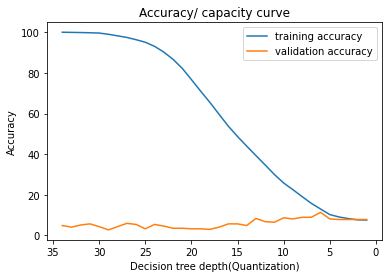

In [69]:
from matplotlib import pyplot as plt

plt.plot(x_list, train_accuracy, label='training accuracy')
plt.plot(x_list, val_accuracy, label='validation accuracy')
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel("Decision tree depth(Quantization)")
plt.ylabel("Accuracy")
plt.title("Accuracy/ capacity curve")
plt.legend()

The difference between training accuracy and validation accurcy is the smallest when the depth of decision tree is 6.
depth ==  6
Training Error: 2349
 Training Accuracy: 13.0 %.
Error: 328
Validation Accuracy: 11.35 %

In [76]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)
# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

In [77]:
# Use the forest's predict method on the test data
predictions = clf.predict(X_test)
# Calculate the absolute errors
errors = np.sum(list(predictions != Y_test))
# Print out the mean absolute error (mae)
print('Error:', errors)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / len(Y_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Error: 272
Accuracy: 9.33 %.


Calculate Generalization

In [78]:
predictions = clf.predict(X_train)

In [79]:
predictions

array([77., 77., 95., ..., 77., 77., 77.])

In [81]:
classes = list(set(Y_train))
len(classes)

23

In [84]:
len(list(Y_train))

2700

In [83]:
from collections import Counter
c=Counter(list(Y_train))
c.keys()

dict_keys([74.0, 65.0, 88.0, 81.0, 46.0, 60.0, 89.0, 56.0, 82.0, 83.0, 77.0, 75.0, 73.0, 78.0, 95.0, 80.0, 94.0, 51.0, 58.0, 41.0, 37.0, 76.0, 43.0])

In [85]:
class_prob_dict = {}
for key in c.keys():
  class_prob_dict[key] = c[key] / len(list(Y_train))
class_prob_dict

{37.0: 0.03222222222222222,
 41.0: 0.03851851851851852,
 43.0: 0.03851851851851852,
 46.0: 0.06111111111111111,
 51.0: 0.07407407407407407,
 56.0: 0.034074074074074076,
 58.0: 0.0337037037037037,
 60.0: 0.0337037037037037,
 65.0: 0.03,
 73.0: 0.05444444444444444,
 74.0: 0.04962962962962963,
 75.0: 0.035925925925925924,
 76.0: 0.03148148148148148,
 77.0: 0.06888888888888889,
 78.0: 0.03962962962962963,
 80.0: 0.03,
 81.0: 0.05037037037037037,
 82.0: 0.0362962962962963,
 83.0: 0.03888888888888889,
 88.0: 0.046296296296296294,
 89.0: 0.056666666666666664,
 94.0: 0.04925925925925926,
 95.0: 0.0362962962962963}

In [87]:
class_correct_dict = {}
for key in c.keys():
  class_correct_dict[key] = 0

In [88]:
i = 0
for element in list(predictions):
  real_class = list(Y_train)[i]
  if real_class == element:
    class_correct_dict[real_class] += 1
  i += 1

In [92]:
import math
res = 0
for key in c.keys():
  cur_prob = class_prob_dict[key]
  cur_correct =  class_correct_dict[key]
  cur = cur_prob * math.log2(cur_prob) * cur_correct
  res -= cur

In [93]:
res

83.17961285634242

In [99]:
mec = 6
mec

6

In [100]:
criterion = 23/22
criterion

1.0454545454545454

In [101]:
g = res / mec
g

13.863268809390403

In [102]:
reselience = 20 * math.log10(1/g)

In [103]:
reselience

-22.837312886181344